# Constante de Boltzmann, cálculos realizados.

In [2]:
using LinearAlgebra
using PyPlot

using PyCall
np = pyimport("numpy")

PyObject <module 'numpy' from '/home/rockdrigo6/anaconda3/lib/python3.8/site-packages/numpy/__init__.py'>

### Primer circuito/alnternativa

Para este primera alternativa que no es la del articulo de Fred se consideró este circuito.

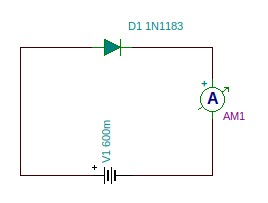

Se tomaron 21 datos para esta simulación variando desde 0.6 mV hasta 0.8 mV. Este circuito es simple, únicamente utilizamos un transistor tipo pn o diodo el cual simplifica un poco al circuito del artículo de Fred Inman

In [3]:
# Para una temperatura de 0°C
V = [0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.70
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.80]

I = [0.0710
    0.0903
    0.1149
    0.1461
    0.1857
    0.2359
    0.2995
    0.3799
    0.4814
    0.6092
    0.7697
    0.9707
    1.2211
    1.5317
    1.9147
    2.3835
    2.9526
    3.6373
    4.4527
    5.4127
    6.53]

# Para una temperatura de 37°C


I37 = [0.3378
0.4175
0.5155
0.6360
0.7837
0.9643
1.1844
1.4519
1.7755
2.1651
2.6315
3.1861
3.8411
4.6084
5.4995
6.5251
7.6943
9.0144
10.4902
12.1248
13.9183]

#Para una temperatura T = 93°C



I93 = [2.0251
2.4018
2.8419
3.3538
3.9461
4.6277
5.4074
6.2937
7.2945
8.4166
9.6658
11.0467
12.5623
14.2141
16.0024
17.9201
19.9825
22.1687
24.4803
26.9128
29.46108]

21-element Vector{Float64}:
  2.0251
  2.4018
  2.8419
  3.3538
  3.9461
  4.6277
  5.4074
  6.2937
  7.2945
  8.4166
  9.6658
 11.0467
 12.5623
 14.2141
 16.0024
 17.9201
 19.9825
 22.1687
 24.4803
 26.9128
 29.46108

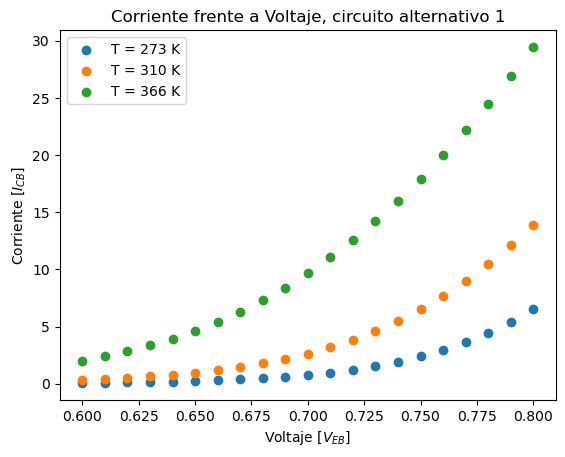

PyObject <matplotlib.legend.Legend object at 0x7fdf6fa2a490>

In [4]:
# Gráficas exponenciales
plt.scatter(V,I,label = "T = 273 K")
plt.title("Corriente frente a Voltaje, circuito alternativo 1")
plt.xlabel(L"Voltaje $[V_{EB}]$")
plt.ylabel(L"Corriente $[I_{CB}]$")

plt.scatter(V,I37, label = "T = 310 K")

plt.scatter(V,I93, label = "T = 366 K")

plt.legend()

In [5]:
#Linealizando la corriente
Ilog = log.(I)
Ilog37 = log.(I37)
Ilog93 = log.(I93)

21-element Vector{Float64}:
 0.7056190820552657
 0.8762184562444459
 1.0444728425674614
 1.2100940313308721
 1.3727277493979186
 1.5320599844127087
 1.6877683858400554
 1.8395491330639036
 1.987120639529813
 2.13020594622981
 2.2685938821266856
 2.4021317408272633
 2.530700265294554
 2.6542344296972487
 2.772738710990906
 2.885922987888357
 2.994856890518037
 3.09868138411013
 3.1978687124709952
 3.292602009864766
 3.383070070240328

In [6]:
#Ajuste por mínimos cuadrados.
function minimosCuadrados(x,y)
    n = length(x)
    A = sum(x.*x)
    B = sum(x)
    C = sum(x.*y)
    D = sum(y)
    
    pendiente = (n*C - B*D)/(n*A - B*B)
    ordenada = (A*D - C*B)/(n*A - B*B)
    return pendiente, ordenada
end    

minimosCuadrados (generic function with 1 method)

In [7]:
#Determinando la pendiente y la ordenada al origen de la recta resultante
recta(m,b,x) = m*x + b
m,b = minimosCuadrados(V,Ilog)
m37,b37 = minimosCuadrados(V,Ilog37)
m93,b93 = minimosCuadrados(V,Ilog93)

(13.456409401797789, -7.235332422463158)

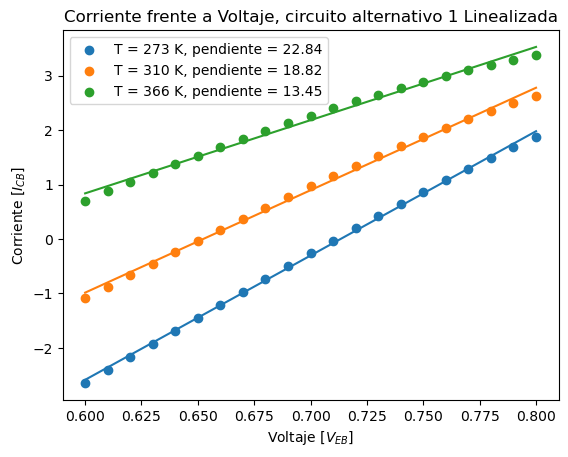

PyObject <matplotlib.legend.Legend object at 0x7fdf6f6c2970>

In [8]:
plt.scatter(V,Ilog,label = "T = 273 K, pendiente = 22.84")   #pendiente = $m:.2f")
plt.title("Corriente frente a Voltaje, circuito alternativo 1 Linealizada")
plt.xlabel(L"Voltaje $[V_{EB}]$")
plt.ylabel(L"Corriente $[I_{CB}]$")

xs = range(0.6, stop = 0.8, length = 100)
ys = [recta(m,b,x) for x in xs]
plt.plot(xs,ys)


plt.scatter(V,Ilog37, label = "T = 310 K, pendiente = 18.82")

xs1 = range(0.6, stop = 0.8, length = 100)
ys1 = [recta(m37,b37,x) for x in xs]
plt.plot(xs1,ys1)

plt.scatter(V,Ilog93, label = "T = 366 K, pendiente = 13.45")

xs1 = range(0.6, stop = 0.8, length = 100)
ys1 = [recta(m93,b93,x) for x in xs]
plt.plot(xs1,ys1)




plt.legend()

Estamos considerando que el valor esperado de la pendiente sea de aproximadamente de 40. Se indagará a ver si hay más circuitos favorables

### Circuito original del artículo de Fred inman

Este circuito me genera muchos problemas en el simulador porque me arroja una corriente sumamente despreciable del orden de picómetros, al momento de generar datos, éstos solo forman rectas y no se distingue bien la curva exponencial. Se pensó que al quitar el potenciometro y utilizar voltajes del orden de kilo se podría solucionar, aunque claro esto ya se escapa de una situación real. 

Los circuitos empleados fueron

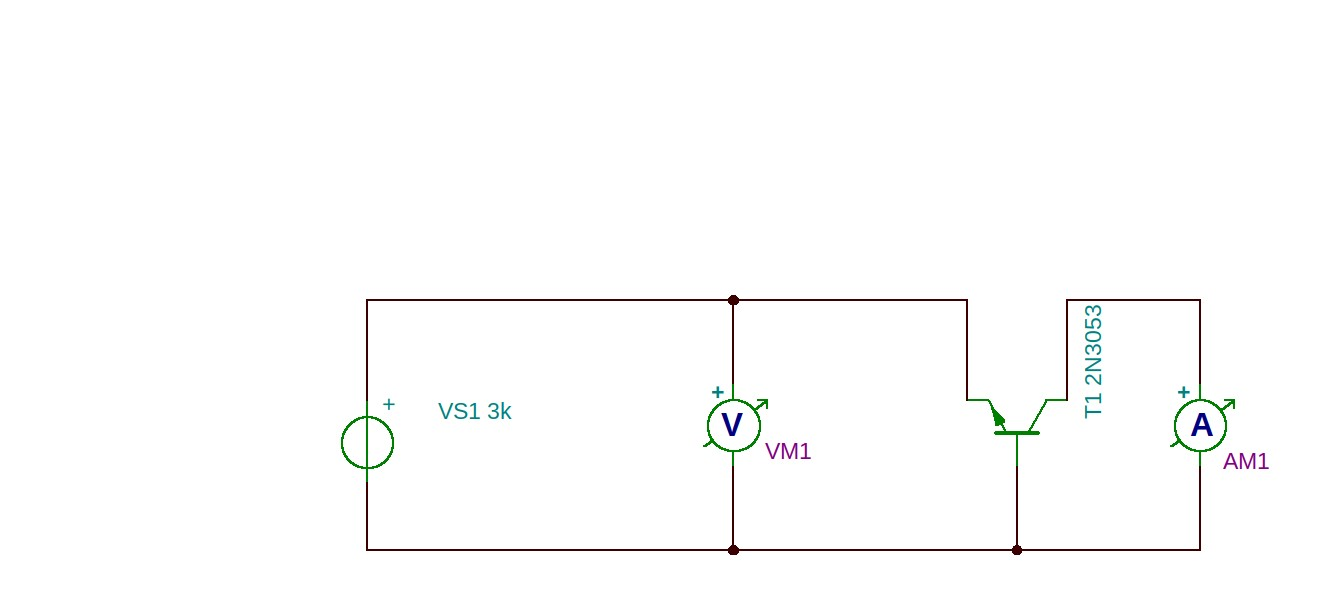

El mostrado en la figura y el mismo solo que con un potenciometro en medio de la fuente y el voltímetro. Los datos recabados con base en el circuito de la figura fueron los siguientes.

In [9]:
V1 = [100
200
300
400
500
600
700
800
900
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000]

I1 = [4.53E-10
1.6135E-9
3.4803E-9
6.0539E-9
9.3342E-9
1.3321E-8
1.8014E-8
2.3415E-8
2.9522E-8
3.6336E-8
5.2084E-8
7.0659E-8
9.2060E-8
1.1628E-7
1.4334E-7
1.7322E-7
2.0593E-7
2.4147E-7
2.7983E-7
3.2102E-7]

20-element Vector{Float64}:
 4.53e-10
 1.6135e-9
 3.4803e-9
 6.0539e-9
 9.3342e-9
 1.3321e-8
 1.8014e-8
 2.3415e-8
 2.9522e-8
 3.6336e-8
 5.2084e-8
 7.0659e-8
 9.206e-8
 1.1628e-7
 1.4334e-7
 1.7322e-7
 2.0593e-7
 2.4147e-7
 2.7983e-7
 3.2102e-7

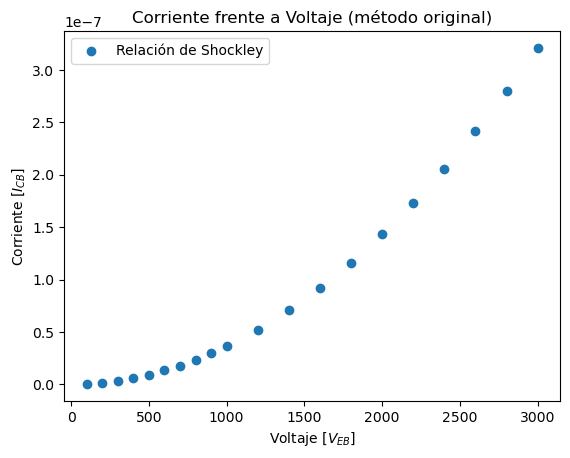

PyObject <matplotlib.legend.Legend object at 0x7fdf6f6a9d00>

In [10]:
plt.scatter(V1,I1, label = "Relación de Shockley")
plt.title("Corriente frente a Voltaje (método original)")
plt.xlabel(L"Voltaje $[V_{EB}]$")
plt.ylabel(L"Corriente $[I_{CB}]$")
plt.legend()

In [11]:
I1log = log.(I1)
V1log = log.(V1)

20-element Vector{Float64}:
 4.605170185988092
 5.298317366548036
 5.703782474656201
 5.991464547107982
 6.214608098422191
 6.396929655216146
 6.551080335043404
 6.684611727667927
 6.802394763324311
 6.907755278982137
 7.090076835776092
 7.24422751560335
 7.3777589082278725
 7.495541943884256
 7.600902459542082
 7.696212639346407
 7.783224016336037
 7.8632667240095735
 7.937374696163295
 8.006367567650246

In [12]:
m1,b1 = minimosCuadrados(V1log,I1log)

(1.945802004587199, -30.555997202109154)

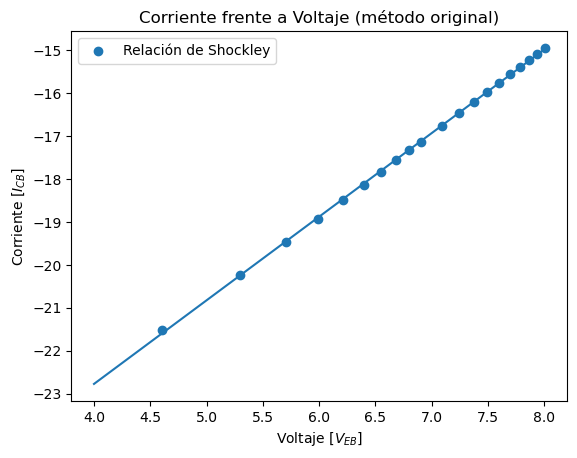

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fdf6f86ed00>

In [13]:
plt.scatter(V1log,I1log, label = "Relación de Shockley")
plt.title("Corriente frente a Voltaje (método original)")
plt.xlabel(L"Voltaje $[V_{EB}]$")
plt.ylabel(L"Corriente $[I_{CB}]$")
plt.legend()

xs = range(4, stop = 8, length = 100)
ys = [recta(m1,b1,x) for x in xs]
plt.plot(xs,ys)

La pendiente que nos arroja solo es de 1.94 aprox, lo cual dista enormemente del valor esperado. Esto es de alguna manera normal puesto que utilizamos voltajes muy grandes y sin una resistencia de por medio, pero ahora veamos si en verdad este circuito funciona o no. A continuación veremos los datos arrojados con el circuito de Fred incluyendo el potenciometro.

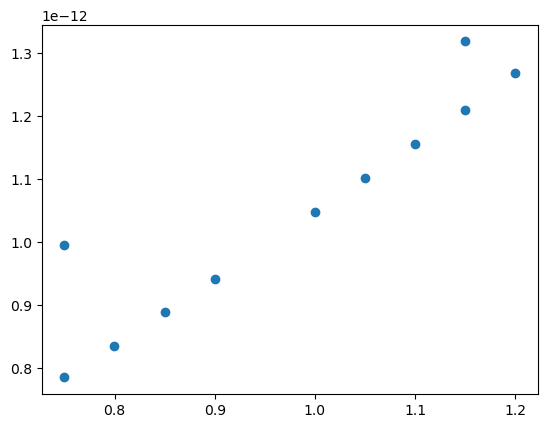

PyObject <matplotlib.collections.PathCollection object at 0x7fdf6f656f40>

In [14]:
VOr = [0.7499
0.7999
0.8499
0.8999
0.7499
0.9999
1.0499
1.0999
1.1499
1.1999
1.1499]

IOr = [7.8492E-13
8.3555E-13
8.888E-13
9.4169E-13
9.952E-13
1.0484E-12
1.102E-12
1.1559E-12
1.210E-12
1.269e-12
1.3189E-12]

plt.scatter(VOr,IOr)

Como podemos ver, solo arroja una recta y el orden de magnitud se encuentra en picómetros cuando debería estar en mili como en los otros ejemplos. A continuacion se  presentará la alternativa definitiva que nos ha arrojado mejores resultados

# Circuito alternativo 3 y opción definitiva para el reporte

#### Se optó por elegir esta alternativa puesto que los otros circuitos tomados en cuenta no arrojaron resultados favorables, por lo que si bien no se descartaron esos métodos por completamente, pues se pretende argumentar porque no salió, se escogió esta alternativa que nos daban valores de pendientes más o menos aceptables. El circuito alternativo escogido fue el siguiente

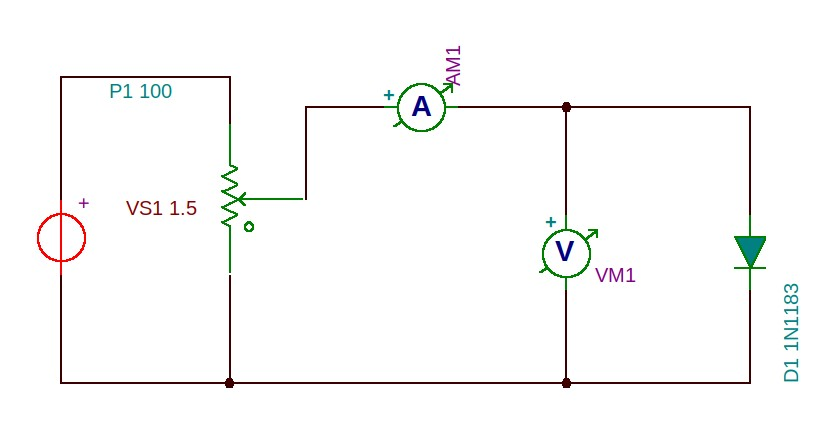

Se tomaron bancos de 20 datos introduciendo un voltaje desde 1.5 V hasta 11 V incrementando de 0.5 en 0.5. TAmbién podemos notar como en lugar de utilizar un transistor, hemos empleado un diodo, es decir un transistor más simple. El valor de la resistencia se mantuvo fijo en 100 Ohms. A continuación los datos y las gráficas.

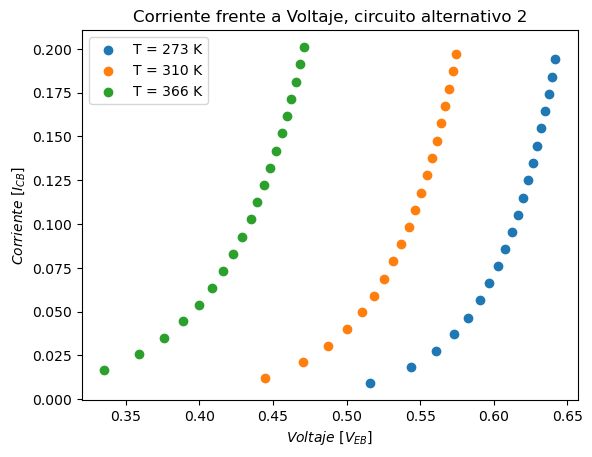

PyObject <matplotlib.legend.Legend object at 0x7fdf982e7b50>

In [15]:
#Banco de datos para las simulaciones con el circuito alternativo 3, bajo las temperaturas de 0°C, 37°C y 93°C
V3 = [0.5159
0.5436
0.5607
0.5730
0.5825
0.5904
0.5970
0.6027
0.6077
0.6122
0.6163
0.62
0.6235
0.6266
0.6296
0.6323
0.6349
0.6373
0.6396
0.6418]

I3 = [0.0093
0.01825
0.0275
0.0371
0.0466
0.05638
0.0661
0.0758
0.0856
0.0955
0.1053
0.1151
0.1250
0.1349
0.1448
0.1547
0.1646
0.1745
0.1840
0.1943]

# Temperatura 37°C

V337 = [0.4449
0.4706
0.4875
0.5002
0.5102
0.5185
0.5256
0.5317
0.5372
0.5421
0.5465
0.5506
0.5543
0.5578
0.5611
0.5641
0.5669
0.5696
0.5722
0.5746]

I337 = [0.0122
0.0211
0.03049
0.0399
0.0495
0.0592
0.0689
0.0787
0.0885
0.0983
0.1081
0.1179
0.1278
0.1376
0.1475
0.1574
0.1673
0.1772
0.1871
0.1970]

# Temperatura 93°C

V393 = [0.3356
0.3592
0.3760
0.38905
0.3996
0.4085
0.4162
0.4230
0.4291
0.4348
0.4394
0.44403
0.4482
0.4521
0.4558
0.4592
0.4624
0.4655
0.4684
0.4711]

I393 = [0.0165
0.0256
0.0349
0.0444
0.0540
0.0636
0.0733
0.0831
0.0928
0.1026
0.1124
0.1222
0.1321
0.1419
0.1517
0.1616
0.1715
0.1813
0.1912
0.2011]

plt.scatter(V3,I3, label = "T = 273 K")
plt.scatter(V337,I337, label = "T = 310 K")
plt.scatter(V393,I393, label = "T = 366 K")

plt.title("Corriente frente a Voltaje, circuito alternativo 2")
plt.xlabel(L"Voltaje\ [V_{EB}]")
plt.ylabel(L"Corriente\ [I_{CB}]")

plt.legend()

In [16]:
I3log = log.(I3)
I337log = log.(I337)
I393log = log.(I393)

20-element Vector{Float64}:
 -4.104394898075602
 -3.6651629274966204
 -3.3552684497737557
 -3.114515809543958
 -2.9187712324178627
 -2.7551418086360604
 -2.613194670089531
 -2.4877105771207346
 -2.377308639189982
 -2.276917346245468
 -2.1856913415225465
 -2.102096232244642
 -2.0241960674538575
 -1.95263269481614
 -1.8858503926276504
 -1.8226311328951421
 -1.7631720123761423
 -1.7076021612213317
 -1.6544352783648362
 -1.6039529822035308

In [54]:
m3,b3 = minimosCuadrados(V3,I3log)
m337,b337 = minimosCuadrados(V337,I337log)
m393,b393 = minimosCuadrados(V393,I393log)
m393

18.430930343201297

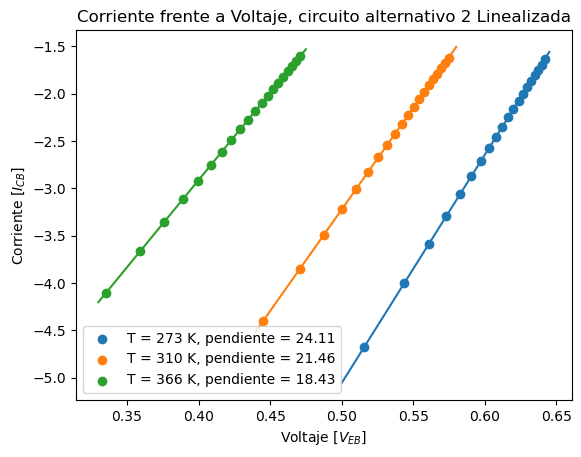

PyObject <matplotlib.legend.Legend object at 0x7fdf9828a820>

In [18]:
plt.title("Corriente frente a Voltaje, circuito alternativo 2 Linealizada")
plt.xlabel(L"Voltaje $[V_{EB}]$")
plt.ylabel(L"Corriente $[I_{CB}]$")

plt.scatter(V3,I3log,label = "T = 273 K, pendiente = 24.11")

xs = range(0.5, stop = 0.645, length = 100)
ys = [recta(m3,b3,x) for x in xs]
plt.plot(xs,ys)

plt.scatter(V337,I337log, label = "T = 310 K, pendiente = 21.46")

xs = range(0.44, stop = 0.58, length = 100)
ys = [recta(m337,b337,x) for x in xs]
plt.plot(xs,ys)

plt.scatter(V393,I393log, label = "T = 366 K, pendiente = 18.43")

xs = range(0.33, stop = 0.475, length = 100)
ys = [recta(m393,b393,x) for x in xs]
plt.plot(xs,ys)

plt.legend()

In [26]:
#Cálculo de constantes de boltzman en función de las pendientes obtenidas para los circuitos tomados en cuenta
k(m,T) = e/(m*T)
e = 1.602E-19

1.602e-19

In [27]:
T1 = 273
T2 = 310
T3 = 366
m1 = m
m2 = m37
m3p = m93
println(k(m1,T1))
println(k(m2,T2))
println(k(m3,T3))

2.5686343668046813e-23
2.744828494240713e-23
3.2527616020237103e-23


In [28]:
println(e/k(m1,T1))
println(e/k(m2,T2))
println(e/k(m3,T3))

6236.777101105476
5836.430230017531
4925.04584105799


In [55]:
T1 = 273
T2 = 310
T3 = 366
m4 = m3
m5 = m337
m6 = m393
println(k(m4,T1))
println(k(m5,T2))
println(k(m6,T3))

2.4330816209920918e-23
2.4076031887807184e-23
2.3748389792718475e-23


In [34]:
println(e/k(m4,T1))
println(e/k(m5,T2))
println(e/k(m6,T3))

6584.242740474866
6653.92041124227
6745.7205056116745


In [36]:
exp1 = (e/k(m1,T1) + e/k(m2,T2) + e/k(m3p,T3))/3
exp2 = (e/k(m4,T1) + e/k(m5,T2) + e/k(m6,T3))/3

6661.294552442938

In [39]:
(abs((exp2-11604.85))/11604.85)*100

42.599046498292196

In [47]:
exp3 = (k(m1,T1)+k(m2,T2)+k(m3p,T3))/3
exp4 = (k(m4,T1)+k(m5,T2)+k(m6,T3))/3

2.4051745963482192e-23

In [51]:
((abs(exp4-1.38E-23))/1.38E-23)*100

74.28801422813183